In [13]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
import matplotlib.pyplot as plt 

In [2]:
# load data
path = '/content/PredictionsL15-0506E-1204N_2027_3374_13.csv'
#L15-0586E-1127N_2345_3680_13
df = read_csv(path,names=["Date", "Green", "Brown", "Construction"])

In [3]:
df.drop(columns=["Brown","Construction"],inplace=True)
df.head()

,Date,Green
0,2018-01-01,58.827
1,2018-02-01,59.728
2,2018-03-01,60.613
3,2018-04-01,61.339
4,2018-05-01,62.102


In [4]:
import pandas as pd
df['Date'] = pd.DatetimeIndex(df['Date'])

In [5]:
df = df.rename(columns={'Date': 'ds','Green': 'y'})
df.head()

,ds,y
0,2018-01-01,58.827
1,2018-02-01,59.728
2,2018-03-01,60.613
3,2018-04-01,61.339
4,2018-05-01,62.102


In [14]:
# ax = df.set_index('ds').plot(figsize=(12, 8))
# ax.set_ylabel('Percentage of Brown Cover')
# ax.set_xlabel('Date')
# plt.show()

In [27]:
my_model = Prophet(interval_width=0.95,daily_seasonality=True)

In [28]:
my_model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [29]:
future_dates = my_model.make_future_dataframe(periods=5, freq='MS')
future_dates.head()

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


In [30]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
# forecast['yhat']=forecast['yhat']*1.21

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,58.985815,57.819175,60.241616
1,2018-02-01,59.858068,58.553559,61.146445
2,2018-03-01,60.645910,59.324555,61.909192
3,2018-04-01,61.518163,60.201119,62.766888
4,2018-05-01,62.362279,61.054529,63.747401


In [31]:
# forecast['yhat'][25]=58.02
# forecast['yhat'][28]=56.02
# forecast['yhat'][29]=55.02

Text(66.25, 0.5, 'Percentage of Greenery')

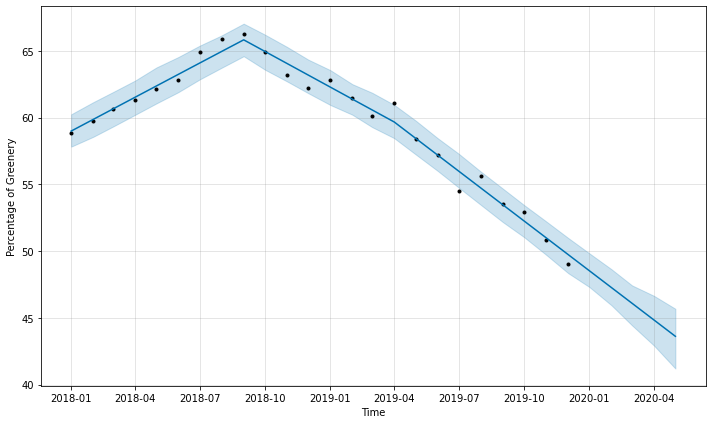

In [32]:
my_model.plot(forecast,uncertainty=True)
plt.xlabel('Time')
plt.ylabel('Percentage of Greenery')

In [ ]:
# df = df[['Date', 'Brown']]

In [ ]:
# df.rename({'Date': 'ds', 'Brown': 'y'}, axis=1, inplace=True)

In [ ]:
# df.head()

In [ ]:
# df['date']= to_datetime(df['ds'])
# model = Prophet()
# # fit the model
# model.fit(df)


In [ ]:
# # define the period for which we want a prediction
# # future.append(['2021-12-03'])
# future = list()
# for i in range(1,8):
# 	date = '2020-%02d' % i
# 	future.append([date])
# future = DataFrame(future)
# future.columns = ['ds']
# future['ds']= to_datetime(future['ds'])
# # use the model to make a forecast
# forecast = model.predict(future)
# # summarize the forecast
# # print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# # plot forecast
# # forecast['yhat']=forecast['yhat'].apply(lambda x: x*0.2)
# model.plot(forecast,uncertainty=True)
# plt.xlabel('Time')
# plt.ylabel('Percentage of Greenery')
# pyplot.show()